In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

# Project 2
## Cardiovascular Disease: Causes, Treatment, and Prevention

In this project, you will investigate one of the the major causes of death in the world: cardiovascular disease!

### Logistics

**Deadline.**  This project is due at **11:59pm PT on Friday, 11/05**. You can receive 5 bonus points for submitting the project by **11:59pm PT on Thursday, 11/04.** Projects will be accepted up to 2 days (48 hours) late. Projects submitted fewer than 24 hours after the deadline will receive 2/3 credit, and projects submitted between 24 and 48 hours after the deadline will receive 1/3 credit. We will *not accept* any projects that are submitted 48 hours or more after the deadline. **There will be no lenience with late submissions.** That includes if you miss the deadline due to internet or submission issues. Please submit early if you anticipate this being a problem. It's **much** better to be early than late, so start working now.

**Checkpoint.**  For full credit, you must complete a checkpoint. For the checkpoint, you must complete the questions up until **the end of Part 2**, pass all public autograder tests for those sections, and submit to the Gradescope Project 2 Checkpoint assignment by **11:59pm PT on Friday, 10/29**. This checkpoint is worth 5% of your entire project grade. There is no partial credit for the checkpoint, and we do not accept late checkpoint submissions. After you've submitted the checkpoint, you may still change your answers before the project deadline -- only your final submission, to the Project 2 assignment, will be graded for correctness. You will have some lab time to work on these questions, but we recommend that you start the project before lab and leave time to finish the checkpoints afterward.

**Partners.** You may work with one other partner; your partner must be from your assigned lab section. **Only one person is required to submit to the checkpoint and project assignments. On Gradescope, the person who submits *must* also designate their partner so that both of you receive credit.** Once you submit, click into your submission, and there will be an option to Add Group Member in the top right corner. You may also reference [this walkthrough video](https://drive.google.com/file/d/1POtij6KECSBjCUeOC_F0Lt3ZmKN7LKIq/view?usp=sharing) on how to add partners on Gradescope. Make sure to **re-add your partner every time you make a new submission**, as Gradescope does not save partner information.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Ed, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Ed post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help. You can find contact information for the staff on the [course website](http://data8.org/fa21/staff.html).

**Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cell we provide. **Every free response question should include an explanation** that adequately answers the question. Your written work will be uploaded to Gradescope automatically after the project deadline; there is no action required on your part for this. 

**Advice.** Develop your answers incrementally. To perform a complicated task, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. 

You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.


---

To get started, load `datascience`, `numpy`, `plots`, and `d8error`. Make sure to also run the first cell of this notebook to load `otter`.

In [2]:
# Run this cell to set up the notebook, but please don't change it.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import d8error

In the following analysis, we will investigate one of the leading causes of death in the world: Cardiovascular Disease. Your investigation will take you across decades of medical research, and you'll look at multiple causes and effects across four different studies.

Here is a roadmap for this project:

* In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2015).
* In Part 2, we'll look at data from the Framingham Heart Study, an observational study into cardiovascular health.
* In Part 3, we'll examine the effect that hormone replacement therapy has on the risk of coronary heart disease for post-menopausal women using data from the Nurses' Heart Study.
* In Part 4, we'll explore the effect that the consumption of saturated fats has on cardiovascular death rates using data from the National Heart-Diet Study.

## Part 1: Causes of Death 

In order to get a better idea of how we can most effectively prevent deaths, we need to first figure out what the major causes of death are. Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).

If you're interested, here is the [original dataset](https://www.cdc.gov/nchs/products/databriefs/db355.htm)! The age adjusted rate is the number of deaths per 100,000 population. 

In [3]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

If we look at unadjusted data, the age distributions of each sample will influence death rates. In an older population, we would expect death rates to be higher for all causes since old age is associated with higher risk of death. To compare death rates without worrying about differences in the demographics of our populations, we adjust the data for age.

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. 

You aren't responsible for knowing how to do this adjustment, but should understand why we adjust for age and what the consequences of working with unadjusted data would be. 

**Question 1.1:** What are all the different causes of death in this dataset? Assign `unique_causes` to an array of all the unique causes of death. 

*Hint:* You should use table methods to determine your solution. Do not hard-code your solution.


<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
- 0
- 3
-->

In [4]:
unique_causes = causes_of_death.group('Cause').column('Cause')
sorted(unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2:** We would like to plot the death rate for each disease over time. To do so, we must create a table with one column for each cause and one row for each year.

Create a table called `causes_for_plotting`. It should have one column called `Year`, and then a column with age-adjusted death rates for each of the causes you found in Question 1. There should be as many of these columns in `causes_for_plotting` as there are causes in Question 1.

*Hint*: Use `pivot`, and think about how the `first` function might be useful in getting the **Age Adjusted Death Rate** for each cause and year combination.

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
- 0
- 0
- 1
- 1
- 1
-->

In [6]:
# This function may be useful.
def first(x):
    return x.item(0)

causes_for_plotting = causes_of_death.pivot('Cause','Year','Age Adjusted Death Rate',first)
causes_for_plotting.show(5)

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2


In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

Let's take a look at how age-adjusted death rates have changed across different causes over time. Run the cell below to compare Heart Disease (a chronic disease) and Influenza and Pneumonia (infectious diseases).

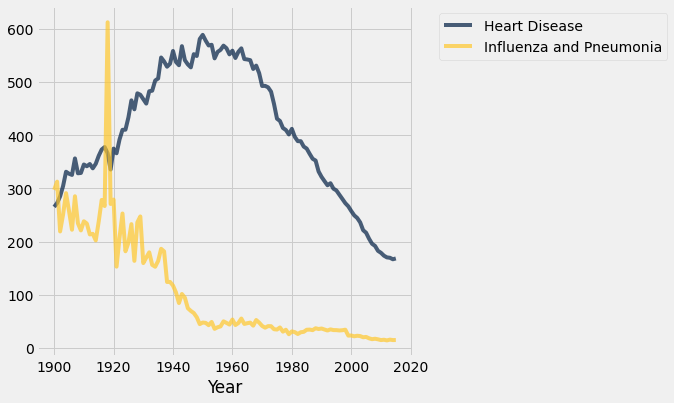

In [8]:
causes_for_plotting.select('Year', "Heart Disease", "Influenza and Pneumonia").plot('Year')

Beginning in 1900 and continuing until 1950, we observe that death rates for Influenza and Pneumonia decrease while death rates for Heart Disease increase. This phenomenon is known as the epidemiological transition: in developed countries, the severity of infectious disease has decreased, but chronic disease has become more widespread. Coronary heart disease (CHD) is one of the most deadly chronic diseases that has emerged in the past century, and more healthcare resources have been invested to studying it.

Run the cell below to see what a plot of the data would have looked like had you been living in 1950. CHD was the leading cause of death and had killed millions of people without warning. It had become twice as lethal in just a few decades and people didn't understand why this was happening.

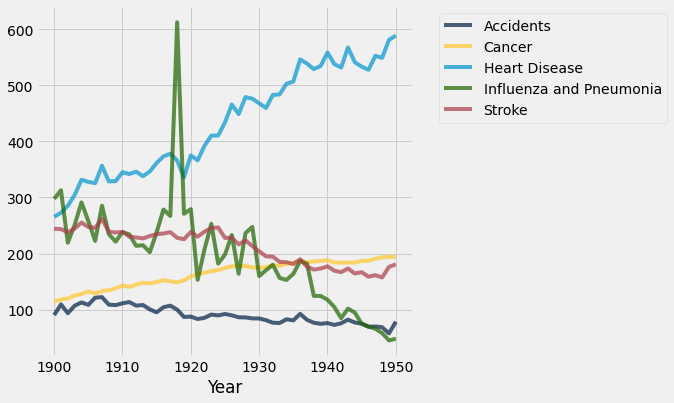

In [9]:
# Do not change this line
causes_for_plotting.where('Year', are.below_or_equal_to(1950)).plot('Year')

The view from 2016 looks a lot less scary, however, since we know it eventually went down. The decline in CHD deaths is one of the greatest public health triumphs of the last half century. That decline represents many millions of saved lives, and it was not inevitable. The Framingham Heart Study, in particular, was the first to discover the associations between heart disease and risk factors like smoking, high cholesterol, high blood pressure, obesity, and lack of exercise.

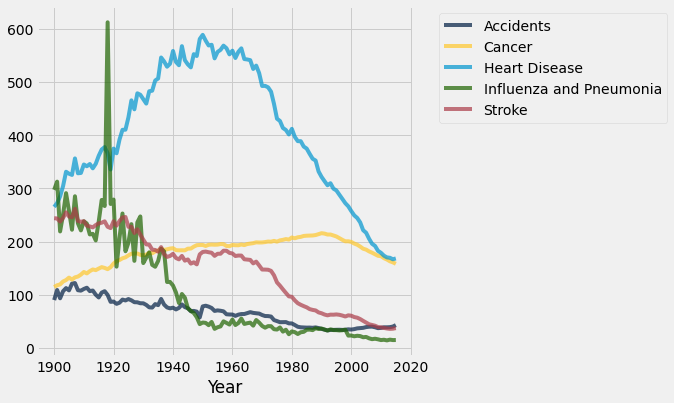

In [10]:
# Do not change this line
causes_for_plotting.plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of most other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.

## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers from  Framingham, Massachusetts for several decades, and followup studies even looked at their descendants. In this part of the project, we'll investigate some of the study's key findings about cholesterol and heart disease.

Run the cell below to examine data for 3,842 subjects from the first wave of the study, collected in 1956.

In [11]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study; a value of 1 indicates that they **did** develop heart disease and a value of 0 indicates that they **did not** develop heart disease.

You may have noticed that the table contains fewer rows than subjects in the original study -- we are excluding subjects who already had heart disease or had missing data.

### Part 2, Section 1: Diabetes and the Population

Before we begin our investigation of cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the **prevalence of diagnosed diabetes (i.e., the proportion of the population who have it) in the U.S. around this time was 0.0093.** We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is *equivalent* to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is *different* from the prevalence of diagnosed diabetes within the population.

**Sanity Check!** What type of test are we running? Confirm your understanding with a peer!

We are going to use the absolute distance between the **observed prevalence** in the study and the **true population prevalence** as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 2.1.1:** What is the observed value of the test statistic in the data from the Framingham Study? Assign `observed_diabetes_distance` to this value. 

*Hint 1*: You should perform your calculations based on the 3,842 subjects in the `framingham` table, not the 5,000 original study participants.

*Hint 2:* Recall that prevalence is defined as the proportion of the population who have a disease.

<!--
BEGIN QUESTION
name: q2_1_1
manual: false
points:
- 0
- 3
-->

In [12]:
true_population_prevalence = 0.0093
observed_prevalence = sum(framingham.column('DIABETES'))/framingham.num_rows
observed_diabetes_distance = abs(true_population_prevalence - observed_prevalence)
observed_diabetes_distance

0.018029515877147319

In [13]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

**Question 2.1.2:** Define the function `diabetes_test_statistic` which should return exactly one simulated statistic of the absolute distance between the observed prevalence and the true population prevalence under the null hypothesis. Make sure that your simulated sample is the same size as your original sample.

*Hint 1:* The array `diabetes_proportions` contains the proportions of the population without and with diabetes, respectively.

*Hint 2*: Recall that prevalence is defined as the proportion of the population who have a disease.


<!--
BEGIN QUESTION
name: q2_1_2
manual: false
points:
- 0
- 3
-->

In [14]:
diabetes_proportions = make_array(.9907, .0093)

def diabetes_test_statistic():
    proportions = sample_proportions(3842, diabetes_proportions)
    return abs(proportions.item(1)-0.0093)

In [15]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

**Question 2.1.3:**  Complete the following code to simulate 5,000 values of the statistic under the null hypothesis.

<!--
BEGIN QUESTION
name: q2_1_3
manual: false
points:
- 1.5
- 1.5
-->

In [16]:
diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    one_sim = diabetes_test_statistic()
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, one_sim)
    
diabetes_simulated_stats

array([ 0.00189209,  0.00019016,  0.00071072, ...,  0.00059068,
        0.00111124,  0.00201213])

In [17]:
grader.check("q2_1_3")

q2_1_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.1.4:** Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*If you're not sure if your histogram is correct, think about how we're generating the sample statistics under the null, and what those statistics will look like*

*Make sure to run the cell that draws the histogram, since it will be graded.*

<!--
BEGIN QUESTION
name: q2_1_4
manual: true
-->

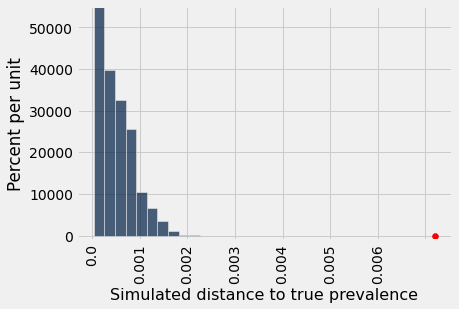

In [19]:
# Don't be alarmed if the value your red dot is on doesn't match with the numerical value
# of your observed_diabetes_distance. If you get a warning, you can ignore it. 
Table().with_column('Simulated distance to true prevalence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red')
plots.ylim(-10, 550);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.1.5:** Based on *just* the histogram above, should you reject the null hypothesis? Explain your answer.

<!--
BEGIN QUESTION
name: q2_1_5
manual: true
-->

_Yes. The obeserved statistic is at far right of the distribution of the simulated statistics. Therefore, the observed statistic is too rare to happen and is unlikely under the null, so we should reject the null hypothesis._

<!-- END QUESTION -->

**Question 2.1.6:** Why might there be a difference between the population and the sample from the Framingham Study? Which of the following statements, *if true*, would explain the higher diabetes prevalence in the Framingham population?

Assign `framingham_explanations` to an array of integer(s) corresponding to the explanation(s), if true, that **are consistent** with the trends we observe in the data and our hypothesis test results. 

1. The Framingham participants were relatively wealthy, and thus ate a luxurious diet high in sugar. High-sugar diets are a known cause of diabetes.
2. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
3. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.

<!--
BEGIN QUESTION
name: q2_1_6
manual: false
points:
- 0
- 0.5
- 0.5
- 0.5
- 1.5
-->

In [22]:
framingham_explanations = make_array(1,2,3)
framingham_explanations

array([1, 2, 3])

In [23]:
grader.check("q2_1_6")

q2_1_6 results: All test cases passed!

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting more information from each person in the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Part 2, Section 2: Cholesterol and Heart Disease

In the remainder of this part, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who develop heart disease is the *same* as the distribution of cholesterol levels among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who develop heart disease are *higher*, on average, than the cholesterol level of people who do not.

**Question 2.2.1:** From the provided null and alternative hypotheses, does it seem reasonable to use A/B Testing to determine which model is more consistent with our data? Assign the variable `ab_reasonable` to `True` if it seems reasonable and `False` otherwise.

<!--
BEGIN QUESTION
name: q2_2_1
manual: false
points:
- 0
- 3
-->

In [24]:
ab_reasonable = True
ab_reasonable

True

In [25]:
grader.check("q2_2_1")

q2_2_1 results: All test cases passed!

**Question 2.2.2:** Now that we have a null hypothesis, we need a test statistic. Which of the following options is the best choice for a test statistic? Assign `ab_test_stat` to an integer corresponding to the best option for our test statistic.

*Hint*: Remember that larger values of the test statistic should favor the alternative over the null.

1. The difference between the average cholesterol levels of those who get heart disease and those who don't
2. The difference between the average cholesterol levels of those who don't get heart disease and those who do
3. The absolute difference between the average cholesterol levels of those who get heart disease and those who don't
4. The absolute difference between the average cholesterol levels of those who don't get heart disease and those who do

<!--
BEGIN QUESTION
name: q2_2_2
manual: false
points:
- 3
-->

In [26]:
ab_test_stat = 1

In [27]:
grader.check("q2_2_2")

q2_2_2 results: All test cases passed!

**Question 2.2.3:** Explain and justify your choice of the test statistic from Question 2.2.2 in three sentences or less.



_Since the alternative hypothesis states that people who develop heart disease have higher cholesterol level (it has direction), choice #3 and #4 are excluded. Also, since larger values of the test statistic should favor the alternative over the null, I choose #1 rather than #2 because #2 will return a small/negative values according to the alternative hypothesis._

**Question 2.2.4:** Write a function that computes your test statistic. It should take a table that has the following two columns, `TOTCHOL` (total serum cholesterol) and `ANYCHD` (whether or not the person had coronary heart disease), and compute the test statistic you described above. Note that the table can have more than just the two columns listed above.

Use the function you defined to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

<!--
BEGIN QUESTION
name: q2_2_4
manual: false
points:
- 0
- 1.5
- 1.5
-->

In [28]:
def framingham_test_statistic(tbl):
    avg_heart_disease = np.mean(tbl.where('ANYCHD',1).column('TOTCHOL'))
    avg_without = np.mean(tbl.where('ANYCHD',0).column('TOTCHOL'))
    return avg_heart_disease - avg_without

framingham_observed_statistic = framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

In [29]:
grader.check("q2_2_4")

q2_2_4 results: All test cases passed!

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 500 times to understand the distribution under the null hypothesis.

**Question 2.2.5:** Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 500 times) and return the value of the test statistic for that simulated sample.

*Hint*: Using `tbl.with_column(...)` with a column name that already exists in `tbl` will replace that column.


<!--
BEGIN QUESTION
name: q2_2_5
manual: false
points:
- 1.5
- 1.5
-->

In [31]:
def simulate_framingham_null():
    shuffled = framingham.sample(with_replacement = False)
    new_tbl = framingham.with_column('ANYCHD',shuffled.column('ANYCHD'))
    stat = framingham_test_statistic(new_tbl)
    return stat
    
# Run your function once to make sure that it works.
simulate_framingham_null()

-0.095032143417142834

In [32]:
grader.check("q2_2_5")

q2_2_5 results: All test cases passed!

**Question 2.2.6:** Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 500 values of the test statistic under the null hypothesis and store the result in the array `framingham_simulated_stats`.

*Hint*: You should use the function you wrote above in Question 2.2.4.

**Warning:** Running this cell should take a few minutes at most. We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

<!--
BEGIN QUESTION
name: q2_2_6
manual: false
points:
- 0
- 1.5
- 2
-->

In [33]:
framingham_simulated_stats = make_array()

for i in np.arange(500):
    framingham_simulated_stats = np.append(framingham_simulated_stats, simulate_framingham_null())

In [34]:
grader.check("q2_2_6")

q2_2_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2.7:** The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

<!--
BEGIN QUESTION
name: q2_2_7
manual: true
-->

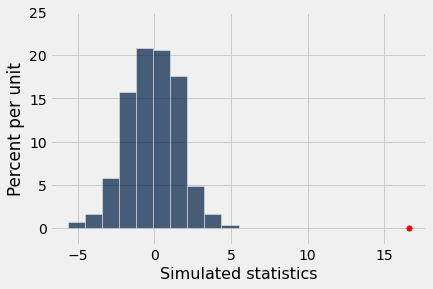

In [35]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=30)
plots.ylim(-0.02, 0.25);

<!-- END QUESTION -->

**Question 2.2.8:** Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_val`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.

<!--
BEGIN QUESTION
name: q2_2_8
manual: false
points:
- 3
-->

In [36]:
framingham_p_val = np.count_nonzero(framingham_simulated_stats>=framingham_observed_statistic)/500
framingham_p_val

0.0

In [37]:
grader.check("q2_2_8")

q2_2_8 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2.9:** Despite the Framingham Heart Study's well-deserved reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be said that high cholesterol *causes* heart disease.

<!--
BEGIN QUESTION
name: q2_2_9
manual: true
-->

_There might be other confounding factors such as smoking. Therefore, we can only draw a conclusion that high cholesterol is related to heart disease and no causal relation can be drawn from this. Also, the data is not obtained from the process of randomized control trials._

<!-- END QUESTION -->



Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

> "Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."

### Checkpoint (due Friday, 10/29 by 11:59pm PT)
Congratulations, you have reached the checkpoint! Run the following cells and submit to the Gradescope assignment titled **Project 2 Checkpoint**.

To get full credit for this checkpoint, you must pass all the public autograder tests above this cell. The cell below will rerun all of the autograder tests for Part 1 and Part 2 so that you can double check your work. 

In [38]:
checkpoint_tests = ["q1_1", "q1_2", "q2_1_1", "q2_1_2", "q2_1_3", "q2_1_6",
                    "q2_2_1", "q2_2_2", "q2_2_4", "q2_2_5", "q2_2_6", "q2_2_8"]
for test in checkpoint_tests:
    display(grader.check(test))

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q2_1_1 results: All test cases passed!

q2_1_2 results: All test cases passed!

q2_1_3 results: All test cases passed!

q2_1_6 results: All test cases passed!

q2_2_1 results: All test cases passed!

q2_2_2 results: All test cases passed!

q2_2_4 results: All test cases passed!

q2_2_5 results: All test cases passed!

q2_2_6 results: All test cases passed!

q2_2_8 results: All test cases passed!

### Submission
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. You can do this by going to `Cell > Run All`. The cell below will generate a zip file for you to submit. Please save before exporting!

**Reminders:**
- Please remember to **add your partner to your Gradescope submission**. If you resubmit, make sure to re-add your partner, as Gradescope does not save any partner information.
- Make sure to wait until the autograder finishes running to ensure that your submission was processed properly and that you submitted to the correct assignment.

In [42]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, force_save=True)

<IPython.core.display.Javascript object>

AssertionError: Notebook project2.ipynb is empty. Please save and checkpoint your notebook and rerun this cell.

## Part 3: Hormone Replacement Therapy for Cardiovascular Health

### The Nurses' Health Study
The Nurses' Health Study (NHS) is another very large observational study which has brought many insights into women's health. It began in 1976, by Dr. Frank Speizer, with questionnaires that were mailed to 121,964 female registered nurses in the United States asking about their medical history, cholesterol and blood pressure, current medications, and so on (one of the benefits of studying nurses is their ability to give reliably accurate answers to these questions). 

The study's initial focus was on investigating the long-term health effects of oral contraceptives, whose use had become much more widespread in the U.S. during the 1960s, but the focus soon expanded to investigating a wide variety of questions on women's health. The NHS is still ongoing, and is now tracking its third generation of nurses in the US.

**One of the most consequential early findings from the NHS was about hormone replacement therapy (HRT)**: supplementary estrogen and progesterone for post-menopausal women to relieve side effects of declining hormone levels due to menopause. The NHS found that HRT in post-menopausal women was negatively associated with heart attack risk. In other words, higher levels of HRT in post-menopausal women were associated with lower risk of heart attack. In a landmark 1985 paper in the *New England Journal of Medicine* (NEJM), Speizer and his coauthors wrote that **women on HRT are half as likely to suffer a heart attack over a certain time period.** [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106) We'll define the term "relative risk" later in this section, and we'll also investigate the interpretation of these claims and their statistical basis.

**Question 3.1:** Based on the passage above, which of the following statements can you infer about the Nurses' Health Study? Assign `nhs_true_statements` to an array of integer(s) corresponding to the statement(s) you believe are correct.

1. Hormone replacement therapy is most commonly used by young women.
2. Since only nurses were included in the study, there's a chance that confounding factors influence our dataset.
3. The study found that estrogen and progesterone use had an association with CHD rates in post-menopausal women (CHD is a leading cause of heart attacks).
4. The study uses data that was self-reported by nurses for the analysis.

<!--
BEGIN QUESTION
name: q3_1
points:
- 0
- 0
- 0.5
- 0.5
- 0.5
- 1.5
-->

In [62]:
nhs_true_statements = make_array(2,4)
nhs_true_statements

array([2, 4])

In [44]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**The scientists running the NHS wanted to compare post-menopausal women who had taken HRT with post-menopausal women who had never taken HRT, excluding all women who were not post-menopausal or who had previously suffered a heart attack.** This study design complicates the analysis because it creates a variety of reasons why women might drop in and out of the relevant comparison groups. They sent out surveys in 1976, 1978, and 1980, so they could receive information at different timestamps and thus participants might "change groups" midway through. 

If you're interested, read more about the study [here](https://pubmed.ncbi.nlm.nih.gov/4047106/).

Because women could (and did) drop into and out of the comparison groups in the middle of the study, it is difficult to make a table like we usually would, with one row per participant. In medical studies, individuals are typically weighted by the *amount of time* that they enrolled in the study. A more convenient sampling unit is a **person-month at risk**, which is one month spent by a particular woman in one of the comparison groups, during which she might or might not suffer a heart attack. Here, "at risk" just means the woman is being tracked by the survey in either of the two comparison groups, so that if she had a heart attack it would be counted in our data set.

**Example**: The table below tracks the histories of two hypothetical post-menopausal women in a six-month longitudinal study, who both enter the study in January 1978:
1. Alice has never been on HRT. She has a heart attack in March and is excluded for the remainder of the study period. 
2. Beatrice begins taking HRT for the first time in April and stays healthy throughout the study period.

| Name     | Month    | HRT | Heart Attack   |                                             
|----------|----------|-----|----------------|
| Alice    | Jan 1978 |  0  | 0              |
| Alice    | Feb 1978 |  0  | 0              |
| Alice    | Mar 1978 |  0  | 1              |
| Beatrice | Jan 1978 |  0  | 0              | 
| Beatrice | Feb 1978 |  0  | 0              |
| Beatrice | Mar 1978 |  0  | 0              |
| Beatrice | Apr 1978 |  1  | 0              |
| Beatrice | May 1978 |  1  | 0              |
| Beatrice | Jun 1978 |  1  | 0              |



Incidence refers to the proportion of persons who develop a condition during a particular time period. Since we want to examine the risk of developing a heart attack, we can define the **incidence rate of a heart attack** as the probability that a heart attack will happen to a given at-risk person in a given time period. The NHS calculated its effects in terms of the **relative risk**, which is simply the incidence rate for *person-months* in the HRT (Group A) group divided by the incidence rate in the no-HRT (Group B) group.

$$\text{Relative Risk} = \frac{\text{Incidence Rate(Treatment Group)}}{\text{Incidence Rate(Control Group)}}$$


**Question 3.2:** Complete the following statements, by setting the variable names to the value that correctly fills in the blank.

If the incidence rate of the treatment group is greater than the incidence rate of the control group, the relative risk will be \_\_`blank_1a`\_\_ one. This means that individuals in the treatment group are at \_\_`blank_1b`\_\_ risk of having a heart attack compared to those in the control group.

If the incidence rate of the treatment group is less than the incidence rate of the control group, the relative risk will be \_\_`blank_2a`\_\_ one. This means that individuals in the treatment group are at \_\_`blank_2b`\_\_ risk of having a heart attack compared to those in the control group.

If the incidence rate of the treatment group is equal to the incidence rate of the control group, the relative risk will be \_\_`blank_3a`\_\_ one. This means that individuals in the treatment group are at \_\_`blank_3b`\_\_ risk of having a heart attack compared to those in the control group.

`blank_1a`, `blank_2a`, `blank_3a` should be set to one of the following strings: "less than", "equal to", or "greater than"

`blank_1b`, `blank_2b`, `blank_3b` should be set to one of the following strings: "lower", "equal", or "higher" 

<!--
BEGIN QUESTION
name: q3_2
points:
- 0
- 0
- 1.5
- 1.5
-->

In [45]:
blank_1a = 'greater than'
blank_1b = 'higher'
blank_2a = 'less than'
blank_2b = 'lower'
blank_3a = 'equal to'
blank_3b = 'equal'

In [46]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Most statistical methods that deal with this type of data assume that we can treat a table like the one above as though it is a sample of independent random draws from a much larger population of person-months at risk in each group. **We will take this assumption for granted throughout the rest of this section.**

Instead of *person-months* at risk, the NHS used *person-years* at risk. It reported 51,478 total person-years at risk in the no-HRT group with 60 heart attacks occurring in total, as well as 54,309 person-years at risk in the HRT group with 30 heart attacks occurring in total. The table NHS below has one row for each person-year at risk. The two columns are 'HRT', recording whether it came from the HRT group (1) or no-HRT group (0), and 'Heart Attack', recording whether the participant had a heart attack that year (1 for yes, 0 for no).

In [47]:
NHS = Table.read_table('NHS.csv')
NHS.show(5)

HRT,Heart Attack
0,0
0,0
0,0
0,0
0,0


Using the NHS data, we can now conduct a hypothesis test to investigate the relationship between HRT and risk of CHD. As a reminder, the **incidence rate** is defined as the proportion of people who died in a specific group out of the total number who participated in the study from that group.

We'll use the following null and alternative hypotheses and test statistic:

**Null Hypothesis:** HRT *does not* affect the risk of CHD, and the true relative risk is equal to 1. Any deviation is due to random chance.

**Alternative Hypothesis:** HRT *decreases* the risk of CHD, and the true relative risk is less than 1.

**Test Statistic:** Relative risk of CHD between post-menopausal women receiving HRT and post-menopausal women not receiving HRT (the definition of relative risk is repeated here for your convenience):

$$\text{Relative Risk} = \frac{\text{Incidence Rate(Treatment Group)}}{\text{Incidence Rate(Control Group)}}$$

**Note:** Remember that we assume, under the null, that the two populations are derived from the same much larger population—under this assumption $\text{Incidence Rate(Treatment Group)} = \text{Incidence Rate(Control Group)}$. After simulation, we test this hypothesis by viewing the `relative_risk` for our simulated samples.

**Question 3.3:** Fill in the missing code below to write a function called `relative_risk` that takes in a table with the column labels `HRT` and `Heart Attack`, and computes the sample relative risk as an estimate of the population relative risk. Do *not* round your answer.

<!--
BEGIN QUESTION
name: q3_3
points:
- 1.5
- 1.5
-->

In [53]:
def relative_risk(tbl):
    """Return the ratio of the incidence rates (events per person-year) for the two groups"""
    inci_rates_treat = tbl.group('HRT',sum).column(1).item(1)/tbl.where('HRT',are.equal_to(1)).num_rows
    inci_rates_control = tbl.group('HRT',sum).column(1).item(0)/tbl.where('HRT',are.equal_to(0)).num_rows
    return inci_rates_treat/inci_rates_control
relative_risk(NHS)


0.47393618000699694

In [58]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4:** Fill in the function `one_bootstrap_rr` so that it **generates one bootstrap sample and computes the relative risk**. Assign `bootstrap_rrs` to 15 estimates of the population relative risk.

*Note:* We are only doing 15 estimates because the code is slow! The cell may take a few seconds to run.

<!--
BEGIN QUESTION
name: q3_4
points:
- 0
- 0
- 2
- 1.5
-->

In [59]:
def one_bootstrap_rr():
    return relative_risk(NHS.sample())

bootstrap_rrs = make_array()
for i in np.arange(15):
    new_bootstrap_rr = one_bootstrap_rr()
    bootstrap_rrs = np.append(bootstrap_rrs, new_bootstrap_rr)

In [60]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5:** The file `bootstrap_rrs.csv` contains a one-column table with 2001 saved bootstrapped relative risks. Use these bootstrapped values to compute a 95% confidence interval, storing the left endpoint as `ci_left` and the right endpoint as `ci_right`. 

Note that our method isn't exactly the same as the method employed by the study authors to get their confidence interval.

<!--
BEGIN QUESTION
name: q3_5
points:
- 0
- 0
- 1.5
- 1.5
-->

In [66]:
bootstrap_rrs_from_tbl = Table.read_table('bootstrap_rrs.csv').column(0)
ci_left = percentile(2.5,bootstrap_rrs_from_tbl)
ci_right = percentile(97.5, bootstrap_rrs_from_tbl)

# Please don't change this line.
print("Middle 95% of bootstrappped relative risks: [{:f}, {:f}]".format(ci_left, ci_right))

Middle 95% of bootstrappped relative risks: [0.295930, 0.730383]


In [67]:
grader.check("q3_5")

q3_5 results: All test cases passed!

The code below plots the confidence interval on top of the bootstrap histogram.

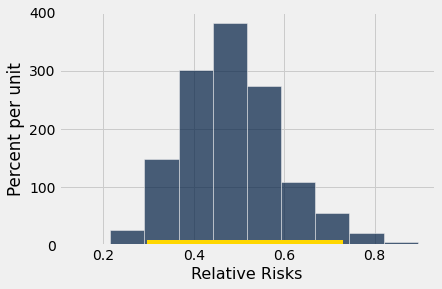

In [68]:
# Just run this cell
Table().with_column("Relative Risks", bootstrap_rrs_from_tbl).hist()
plots.plot([ci_left, ci_right], [.05,.05], color="gold");

**Question 3.6:** The following text is an excerpt from the abstract of the original 1985 paper. 
> As compared with the risk in women who had never used postmenopausal hormones, the age-adjusted relative risk of coronary disease in those who had ever used them was 0.5 (95 per cent confidence limits, 0.3 and 0.8; P = 0.007)... These data support the hypothesis that the postmenopausal use of estrogen reduces the risk of severe coronary heart disease. [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106)

The authors give a 95% confidence interval of [0.3, 0.8] for the relative risk. Which of the following statements can be justified based on that confidence interval? Assign `ci_statements` to an array of integer(s) corresponding to the statement(s) you believe are correct.

1. There is a 95% chance the relative risk is between 0.3 and 0.8.
2. If we used a P-value cutoff of 5%, we would reject the null hypothesis that HRT does not affect the risk of CHD.
3. If we redo the procedure that generated the interval [0.3, 0.8] on a fresh sample of the same size, there is a 95% chance it will include the true relative risk.
4. There is between a 30% and 80% chance that any woman will suffer a heart attack during the study period.

<!--
BEGIN QUESTION
name: q3_6
points:
- 0
- 1
- 1
- 1
-->

In [69]:
ci_statements = make_array(2,3)

In [70]:
grader.check("q3_6")

q3_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.7:** What can you conclude from this test? Was hormone replacement therapy associated with an increased or decreased risk of heart attacks? Can we say that HRT caused an change in the risk of heart attacks? Explain your reasoning in 2-4 sentences. 

*Hint*: Refer back to Question 3.2 for the definition and interpretations of relative risk.

<!--
BEGIN QUESTION
name: q3_7
manual: true
-->

_Since relative risk equals to 1 is not in the confidence interval, the p-value is almost 0. Therefore, we can reject the null hypothesis and draw a conclusion that there is a negative association between hormone replacement therapy and the risk of heart attacks. We cannot state the causality between HRT and the risk of heart attacks because there might be some other confounding factors that results in the risk of heart attacks, and the sample was not drawn through RCTs._

<!-- END QUESTION -->



Partly as a result of evidence from the NHS and other observational studies that drew similar conclusions, HRT drugs became a very popular preventive treatment for doctors to prescribe to post-menopausal woman. Even though there were known or suspected risks to the treatment (such as increasing the risk of invasive breast cancer), it was thought that the reduction in heart disease risk was well worth it.

However, a later study, the [Heart and Estrogen-Progestin Replacement Study](https://jamanetwork.com/journals/jama/fullarticle/187879), found that HRT did **not** have a significant impact on a woman's risk of CHD. These findings contradicted the results of the Nurses' Heart study, challenging the efficacy of a treatment that had become the standard of care for heart disease prevention. The HERS study authors put forward a possible answer regarding why the NHS study might be biased:
> The observed association between estrogen therapy and reduced CHD risk might be attributable to selection bias if women who choose to take hormones are healthier and have a more favorable CHD profile than those who do not. Observational studies cannot resolve this uncertainty.

**Selection bias** occurs in observational studies when there is a systematic difference between participants that receive a treatment and participants that do not receive a treatment. When this type of bias is present, the observed treatment effect might be a result of an unmeasured confounding variable.

<!-- BEGIN QUESTION -->

**Question 3.8**: If women who choose to take hormones are healthier to begin with than women who choose not to, why might that systematically bias the results of observational studies like the NHS? Would we expect observational studies to overestimate or underestimate the protective effect of HRT?


<!--
BEGIN QUESTION
name: q3_8
manual: true
-->

_If women who choose to take hormones are healthier in the first place, we cannot attribute the lower risk of heart attack to solely the HRT treatment because these women already have a lower chance of having heart attacks regardless of the treatment. The observational studies in this situation would overestiate the protective effect of HRT._

<!-- END QUESTION -->



### Further reading

If you're interested in learning more, you can check out these articles:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)
* [NYT article on the Nurses' Health Study and the HERS study](https://www.nytimes.com/2003/04/22/science/hormone-studies-what-went-wrong.html)

## Part 4: Diet and Cardiovascular Disease

To establish a causal link between saturated fat intake, serum cholesterol, and heart disease, a group of doctors
in the US established the National Heart-Diet Study. The study was based in 6 centers: Baltimore, Boston, Chicago, Minneapolis-St. Paul, Oakland, and Faribault, MN. The first 5 centers recruited volunteers from the local population: volunteers and their families were asked to adjust their diet to include more or less saturated fat.

The sixth center was organized by Dr. Ivan Frantz, and its study was known as the Minnesota Coronary
Experiment.  The main difference between the Minnesota Coronary Experiment and the rest of the National Diet-Heart Study was
the setting. While the other centers in the study looked at volunteers, Dr. Frantz conducted his study at Faribault
State Hospital, which housed patients who were institutionalized due to disabilities or mental illness.

Although standards for informed consent in participation weren't as strict then as they are today, the study was
described as follows:

>No consent forms were required because the study diets were considered to be acceptable as house diets and
the testing was considered to contribute to better patient care. Prior to beginning the diet phase, the project was
explained and sample foods were served. Residents were given the opportunity to decline participation.

Despite the level of detail and effort in the study, the results of the study were never extensively examined until
the early 21st century. Over 40 years after the data were collected, Dr. Christopher Ramsden heard about the
experiment and asked Dr. Frantz's son, Robert, to uncover the files in the Frantz family home's dusty basement.
You can learn more about the story of how the data was recovered on the [Revisionist History podcast](http://revisionisthistory.com/episodes/20-the-basement-tapes) or in [Scientific American magazine](https://www.scientificamerican.com/article/records-found-in-dusty-basement-undermine-decades-of-dietary-advice/).

In recent years, poor treatment of patients at Faribault State Hospital (and other similar institutions in Minnesota)
has come to light: the state has recently changed patients' gravestones from numbers to their [actual names](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/), and apologized for [inhumane treatment of patients](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/).

<!-- BEGIN QUESTION -->

**Question 4.1:** While the data from such a study may be useful scientifically, it also raises major ethical concerns. Describe at least one ethical problem with the study conducted at Faribault State Hospital.

*Hint*: There isn't necessarily a single right or wrong answer to this question. If you're not sure, some areas of consideration may be the study organizers' selection of participants for the study, as well as their justification for not using consent forms. You could also ask yourself how the project might have been explained to the patients prior to the diet phase, and to what degree were they capable of consent.

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->

_1. It's unethical because the the study was done on a hospital that housed patients with disabilities and mental illness. They might not be a good condition to make a fully informed and aware decision to be part of the study.          
2. The consent forms were not required, which deprived participants' rights to know. Although the researchers believed study diets was acceptable, they should not make decisions for the participants. The participants have the rights to know what the study do and what the consequences are._

<!-- END QUESTION -->



### The Data

The National Heart-Diet Study was very relevant for analysis on the relationship between saturated fats and heart disease. However, an important part of medical studies is *replication*, or being able to see the same results in multiple studies.

Suppose that 50 scientists decide to independently recreate the NHDS study. Each of these fictional researchers studied 100 people and collected data on whether their diet was **high** or **low** in saturated fats. To imitate the original experiment, the researchers followed up 5 years later and recorded whether each participant was alive or dead at that time. Note that this fictional study is unlike Dr. Frantz's experiment in that this scenario is observing whether the participants' diets were high or low in saturated fats. The participants are not assigned to a certain group. 

We will assume that all 50 scientists sampled from the same population, described in full below. Note that *normally* we would never have access to this information - we'd only know the data in our sample. The table `population` has a row for each person in the population, and the following three attributes:
- **Age**: a string, the age group of the person
- **Diet**: a string, "low" or "high" describing the amount of saturated fats in the person's diet
- **Died**: a boolean, describing whether or not the person had died within the 5 years

Run the cell below to see what the population looked like.

In [71]:
population = Table.read_table('population.csv').drop(0)
population.show(5)

Age,Diet,Died
0-34,Low,True
0-34,Low,True
0-34,Low,True
0-34,Low,False
0-34,Low,False


<!-- BEGIN QUESTION -->

### Running a Hypothesis Test
You have been tasked with helping these scientists explore how different diets are associated with death rates. Since the samples were taken at random, the 50 scientists may have reached different conclusions, even if they do the same hypothesis test.

**Question 4.2**: Set up a null hypothesis and an alternative hypothesis that we can use to answer whether or not the amount of saturated fat in ones diet is associated with different rates of death in the two groups. We are interested in observing *any* change, not specifically an increase or decrease in death rates.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

_Null hypothesis: There is no association between the amount of fat consumed and the death rate, meaning that the death rate of ones with high saturated fat diet is the same as those with low saturated fat diet._                                  

_Alternative hypothesis: The death rates of the two groups are different._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.3**: In thinking of a test statistic, one researcher decides that the absolute difference in the number of people who died in each group is a valid test statistic. Give one specific reason why this test statistic will not work.

<!--
BEGIN QUESTION
name: q4_3
manual: true
-->

   _Since each group might have different number of people, only comparing the absolute difference in the number of people who died is not fair and it's not an accurate reflection of the death rate of each group._

<!-- END QUESTION -->



To combat the problem above, we instead decide to use the the absolute difference in incidence rates between the two groups as our test statistic. Here, the incidence rate of death is defined as **the proportion of people who *died* in a specific group out of the total number who participated in the study from that group.**

The researchers have provided two functions that may help you. These are similar to functions you have defined earlier to perform hypothesis tests.

In [72]:
# Just run this cell

def compute_incidence_statistic(data_tbl):
    """"Given a sample from population, returns the test statistic"""
    summed_tbl = data_tbl.with_column("Total", 1).drop('Age').group('Diet', sum)
    incidence_rate = summed_tbl.column("Died sum") / summed_tbl.column("Total sum")
    return abs(incidence_rate.item(0) - incidence_rate.item(1))

def simulate_death_null(tbl):
    """Simulates a single value of the test statistic under the null hypothesis."""
    shuffled_death = tbl.select('Died').sample(with_replacement=False).column(0)
    return compute_incidence_statistic(tbl.with_column('Died', shuffled_death))

**Question 4.4**: We are now in a position to run a hypothesis test to help differentiate between our two hypotheses using any set of sample data. Define a function `complete_test` which takes in `tbl`, a single sample from the population. It should shuffle labels and calculate the incidence rate difference for the sample under the null hypothesis 100 times, and use these simulated values to return a p-value with respect to the observed data.

*Hint*: The two functions defined above, `compute_incidence_statistic` and `simulate_death_null`, may be useful here. 

<!--
BEGIN QUESTION
name: q4_4
manual: false
points:
- 0
- 0
- 3
-->

In [73]:
def complete_test(tbl):
    repetitions = 100
    statistics = make_array()
    for i in np.arange(repetitions):
        statistics = np.append(statistics, (simulate_death_null(tbl)))
    p_value = np.count_nonzero(statistics>=compute_incidence_statistic(tbl))/repetitions
    return p_value

In [74]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5**: Using the function you just defined, simulate taking 50 different samples of size 100 without replacement from the `population` table, and **run a hypothesis test on each of them**. (Note that we are running 50 hypothesis tests, rather than computing 50 test statistics). Store the resulting p-values in an array called `results`.

*Note*: The cell may take a few seconds to run.

<!--
BEGIN QUESTION
name: q4_5
manual: false
points:
- 0
- 0
- 3
-->

In [75]:
repetitions = 50
results = make_array()
for i in np.arange(repetitions):
    new_pop = population.sample(100, with_replacement = False)
    stat = make_array()
    for k in np.arange(100):
        stat = np.append(stat, simulate_death_null(new_pop))
    p_val = np.count_nonzero(stat>=compute_incidence_statistic(new_pop))/100
    results = np.append(results,p_val)
results

array([ 1.  ,  1.  ,  0.1 ,  0.33,  0.55,  1.  ,  0.13,  1.  ,  0.63,
        0.79,  0.63,  0.44,  1.  ,  0.63,  0.6 ,  0.7 ,  1.  ,  1.  ,
        1.  ,  0.47,  1.  ,  0.62,  0.68,  1.  ,  0.69,  0.08,  0.25,
        0.53,  0.21,  0.37,  0.5 ,  0.09,  0.08,  0.29,  0.08,  0.65,
        1.  ,  0.52,  0.42,  0.48,  0.18,  0.24,  0.66,  0.27,  0.43,
        0.62,  1.  ,  0.63,  0.75,  1.  ])

In [76]:
grader.check("q4_5")

q4_5 results: All test cases passed!

**Question 4.6**: For each test, can its scientist conclude that the amount of fat in ones diet is associated with a changed death rate? Suppose we decide to use a p-value cutoff of 0.05. Assign `rejected_null` to an array whose entries are either `True` or `False` depending on whether the corresponding test rejected the null or failed to reject the null, respectively. For example, if the 0th test failed to reject the null, the 0th item in the array should be `False`. 

<!--
BEGIN QUESTION
name: q4_6
manual: false
points:
- 0
- 0
- 1.5
- 1.5
-->

In [77]:
rejected_null = results<0.05
rejected_null

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)

In [78]:
grader.check("q4_6")

q4_6 results: All test cases passed!

**Question 4.7**: Suppose you now find out that the null hypothesis is actually true -- in the population, there is no significant difference in death rates based on saturated fat consumption. What proportion of the conclusions were incorrect (i.e. they wrongly rejected the null)? Assign this value to `actual_prop_wrong`. What proportion of the conclusions did you *expect* to be incorrect? Assign that value to `expected_prop_wrong`.

<!--
BEGIN QUESTION
name: q4_7
manual: false
points:
- 0
- 1.5
- 1.5
-->

In [79]:
actual_prop_wrong = np.count_nonzero(rejected_null==1)/50
expected_prop_wrong = 0.05
actual_prop_wrong, expected_prop_wrong

(0.0, 0.05)

In [80]:
grader.check("q4_7")

q4_7 results: All test cases passed!

### Congratulations! 

You have completed your own large scale case study into cause and effect surrounding one of the world's leading causes of death: cardiovascular disease. Your investigation has taken you through multiple important data sets and across decades of medical research.

Before you submit, please fill out the **[Official Project 2 Partner Form](https://docs.google.com/forms/d/e/1FAIpQLScFigoSW9xXlLd4h_6BHRKZUVa09J5lp4WY7-f-f9xfiBUSTw/viewform?usp=sf_link)**. This will be used to assign grades to both partners. Note that this form is different from the form you should have received from your GSI for project partner matching. This form is **mandatory**. However, if you are working with a partner, only one person needs to submit the form. **Before you close out of the form, take note of the secret word. Then, assign `secret_word` to the secret word given at the end of the form.**

<!--
BEGIN QUESTION
name: q5_1
manual: false
points:
- 3
-->

In [81]:
secret_word = "heartbeat"

In [82]:
grader.check("q5_1")

q5_1 results: All test cases passed!

You're finished! Time to submit. 


**Reminders:**
- Please remember to **add your partner to your Gradescope submission**. If you resubmit, make sure to re-add your partner, as Gradescope does not save any partner information.
- Make sure to wait until the autograder finishes running to ensure that your submission was processed properly and that you submitted to the correct assignment.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [83]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q2_1_1 results: All test cases passed!

q2_1_2 results: All test cases passed!

q2_1_3 results: All test cases passed!

q2_1_6 results: All test cases passed!

q2_2_1 results: All test cases passed!

q2_2_2 results: All test cases passed!

q2_2_4 results: All test cases passed!

q2_2_5 results: All test cases passed!

q2_2_6 results: All test cases passed!

q2_2_8 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 results: All test cases passed!

q4_6 results: All test cases passed!

q4_7 results: All test cases passed!

q5_1 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [87]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, force_save=True)

<IPython.core.display.Javascript object>

AssertionError: Notebook project2.ipynb is empty. Please save and checkpoint your notebook and rerun this cell.